In [1]:
import diffusers
import torch
import torch.nn as nn
import sys
sys.path.append("../")

from dataclasses import dataclass
from utils import ddpm_evaluate
from DDPMPipelineDropout import DDPMPipeline

In [2]:
pipeline = DDPMPipeline.from_pretrained("ddpm-ffhq-128/").to("cuda")

In [3]:
@dataclass
class TrainingConfig:
    run_name = "DDPM-FFHQ-TEST"
    num_train_timestamps = 1000
    dataset = "FFHQ" # "CIFAR10" / "FFHQ"
    image_size = 32  # the generated image resolution
    train_batch_size = 6
    eval_batch_size = 1  # how many images to sample during evaluation
    num_epochs = 50
    gradient_accumulation_steps = 1
    learning_rate = 1e-4
    lr_warmup_steps = 500
    save_image_epochs = 1
    save_model_epochs = 1
    mixed_precision = 'fp16'  # `no` for float32, `fp16` for automatic mixed precision
    output_dir = 'ddpm-ffhq-128'  # the model namy locally and on the HF Hub
    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 0
    down_dropout = 0.0
    mid_dropout = 0.0
    up_dropout = 0.0
    bayesian_avg_samples = 2
    bayesian_avg_range = (500, 1000)

config = TrainingConfig()

True


  0%|          | 0/1000 [00:00<?, ?it/s]

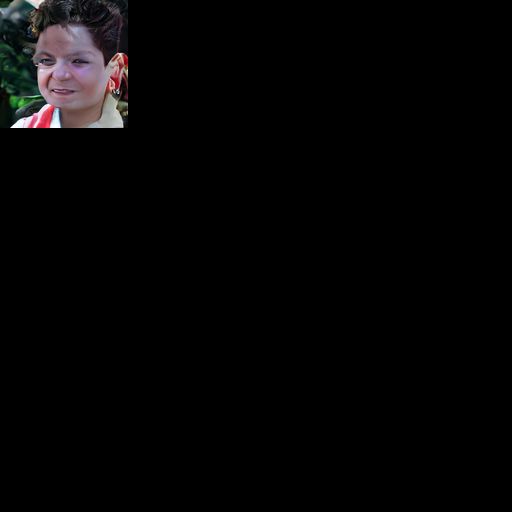

In [4]:
ddpm_evaluate(config, -1, pipeline)